# Census Data Exploration - Health Metrics

### Data from the 2021 5-year ACS estimates 

#### Alejandra Rios

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Importing data

In [2]:
# load data file
# specify FIPS, state, and county data as strings to keep the leading zero
df = pd.read_csv(
    'Data/AcsDataAle.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

## Observing data

In [3]:
# number or rows and columns
df.shape

(2498, 435)

In [4]:
#first 5 rows
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,PCT_SE_A10030_003,PCT_SE_A10030_004,PCT_SE_A10030_005,PCT_SE_A10030_006,PCT_SE_A10030_007,SE_B18002_001,SE_B18002_002,SE_B18002_003,PCT_SE_B18002_002,PCT_SE_B18002_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,26.64,43.57,13.65,2.61,0.67,644,179,175,27.80,27.17
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,20.26,43.22,22.81,8.82,4.23,344,181,62,52.62,18.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,27.86,44.80,12.75,7.07,2.14,762,198,210,25.98,27.56
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,35.24,36.28,6.21,5.86,1.59,1140,346,410,30.35,35.96
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,31.02,41.60,2.99,3.42,0.00,816,44,488,5.39,59.80


In [5]:
# data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 435 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Geo_FIPS            2498 non-null   object 
 1    Geo_QName           2498 non-null   object 
 2    Geo_FILEID          2498 non-null   object 
 3    Geo_STUSAB          2498 non-null   object 
 4    Geo_SUMLEV          2498 non-null   int64  
 5    Geo_GEOCOMP         2498 non-null   int64  
 6    Geo_LOGRECNO        2498 non-null   int64  
 7    Geo_US              0 non-null      float64
 8    Geo_REGION          0 non-null      float64
 9    Geo_DIVISION        0 non-null      float64
 10   Geo_STATECE         0 non-null      float64
 11   Geo_STATE           2498 non-null   object 
 12   Geo_COUNTY          2498 non-null   object 
 13   Geo_COUSUB          0 non-null      float64
 14   Geo_PLACE           0 non-null      float64
 15   Geo_TRACT           2498 non-null   

## Delete Null Data

In [6]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [7]:
df = df.dropna(axis=1,how="all")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Columns: 392 entries, Geo_FIPS to PCT_SE_B18002_003
dtypes: float64(184), int64(200), object(8)
memory usage: 7.5+ MB


In [9]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,PCT_SE_A10030_003,PCT_SE_A10030_004,PCT_SE_A10030_005,PCT_SE_A10030_006,PCT_SE_A10030_007,SE_B18002_001,SE_B18002_002,SE_B18002_003,PCT_SE_B18002_002,PCT_SE_B18002_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,...,26.64,43.57,13.65,2.61,0.67,644,179,175,27.80,27.17
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,...,20.26,43.22,22.81,8.82,4.23,344,181,62,52.62,18.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,...,27.86,44.80,12.75,7.07,2.14,762,198,210,25.98,27.56
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,...,35.24,36.28,6.21,5.86,1.59,1140,346,410,30.35,35.96
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,...,31.02,41.60,2.99,3.42,0.00,816,44,488,5.39,59.80


## Cleaning up data with desired columns

In [39]:
# define columns to keep
columns_to_keep = ['Geo_FIPS',
                   #insurance
                   'SE_A20001_003',
                   'PCT_SE_A20001_003',
                   #no insurance
                   'SE_A20001_002',
                   'PCT_SE_A20001_002',
                   #public insurance
                   'SE_A20001_004',
                   'PCT_SE_A20001_004',
                   #private insurance
                   'SE_A20001_005',
                   'PCT_SE_A20001_005',
                   #means of transportation (commuting) car
                   'SE_A09005_002',
                   'PCT_SE_A09005_002',
                   #means of transportation (commuting) public transit
                   'SE_A09005_003',
                   'PCT_SE_A09005_003',
                    #means of transportation (commuting) motorcycle
                   'SE_A09005_004',
                   'PCT_SE_A09005_004',
                  #means of transportation (commuting) bicycle
                   'SE_A09005_005',
                   'PCT_SE_A09005_005',
                  #means of transportation (commuting) walked
                   'SE_A09005_006',
                   'PCT_SE_A09005_006', 
                  #means of transportation (commuting) other
                   'SE_A09005_007',
                   'PCT_SE_A09005_007']
# add it to a new dataframe
df2 = df[columns_to_keep]

## Renaming columns

In [40]:
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A20001_003',
 'PCT_SE_A20001_003',
 'SE_A20001_002',
 'PCT_SE_A20001_002',
 'SE_A20001_004',
 'PCT_SE_A20001_004',
 'SE_A20001_005',
 'PCT_SE_A20001_005',
 'SE_A09005_002',
 'PCT_SE_A09005_002',
 'SE_A09005_003',
 'PCT_SE_A09005_003',
 'SE_A09005_004',
 'PCT_SE_A09005_004',
 'SE_A09005_005',
 'PCT_SE_A09005_005',
 'SE_A09005_006',
 'PCT_SE_A09005_006',
 'SE_A09005_007',
 'PCT_SE_A09005_007']

In [42]:
df2.columns = ['FIPS',
 'insurance',
 '% insurance',
 'no insurance',
 '% no insurance',
 'public insurance',
 '% public insurance',
 'private insurance',
 '% private insurance',
 'transportation-car',
 '% transportation-car',
 'transportation-publictransit',
 '% transportation-publictransit',
 'transportation-motorcycle',
 '% transportation-motorcycle',
 'transportation-bicycle',
 '% transportation-bicycle',
 'transportation-walked',
 '% transportation-walked',
 'transportation-other',
 '% transportation-other']

In [43]:
df2.sample(5)

,FIPS,insurance,% insurance,no insurance,% no insurance,public insurance,% public insurance,private insurance,% private insurance,transportation-car,...,transportation-publictransit,% transportation-publictransit,transportation-motorcycle,% transportation-motorcycle,transportation-bicycle,% transportation-bicycle,transportation-walked,% transportation-walked,transportation-other,% transportation-other
587,06037206202,1763,96.13,71,3.87,1124,61.29,951,51.85,403,...,193,24.68,0,0.0,0,0.0,47,6.01,0,0.00
77,06037109601,4354,89.79,495,10.21,1444,29.78,3217,66.34,2145,...,21,0.86,0,0.0,0,0.0,54,2.22,29,1.19
791,06037228800,4157,76.47,1279,23.53,2925,53.81,1472,27.08,2015,...,359,14.85,0,0.0,0,0.0,32,1.32,11,0.46
2248,06037700901,3865,97.38,104,2.62,821,20.69,3349,84.38,1457,...,56,3.08,0,0.0,0,0.0,48,2.64,6,0.33
1093,06037297201,3975,89.91,446,10.09,1815,41.05,2365,53.49,1781,...,116,5.40,0,0.0,0,0.0,76,3.54,0,0.00


## Charts from data

### Chart for top 10 census tracts in LA county for 'no insurance'

In [65]:
df_sorted = df2.sort_values(by='no insurance',ascending = False)

In [66]:
df_sorted[['FIPS','no insurance']].head(10)

,FIPS,no insurance
1740,06037535101,1827
632,06037209402,1771
1691,06037532900,1624
2421,06037920047,1534
497,06037192520,1482
1695,06037533104,1430
1447,06037433901,1401
678,06037212900,1375
1142,06037302401,1337
622,06037208903,1337


<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Levels of People with No Insurance in Los Angeles County in 2021'}, ylabel='FIPS'>

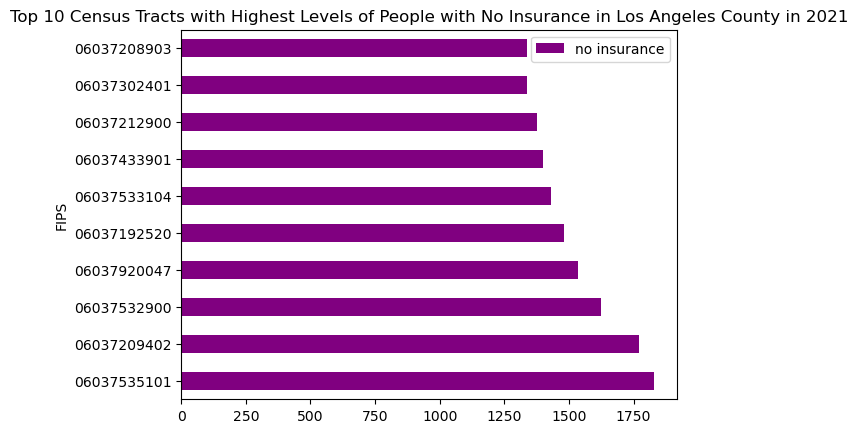

In [69]:
df_sorted.head(10).plot.barh(x='FIPS',
                            y='no insurance', 
                            title='Top 10 Census Tracts with Highest Levels of People with No Insurance in Los Angeles County in 2021',
                            color='purple')

### Scatterplot for no insurance vs insurance

<AxesSubplot: xlabel='no insurance', ylabel='insurance'>

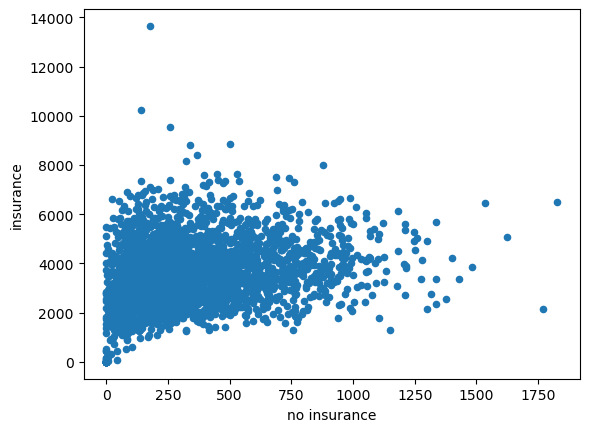

In [70]:
df2.plot.scatter(x='no insurance',y='insurance')

### scatterplot for commuting by public transit vs car 

<AxesSubplot: xlabel='transportation-publictransit', ylabel='transportation-car'>

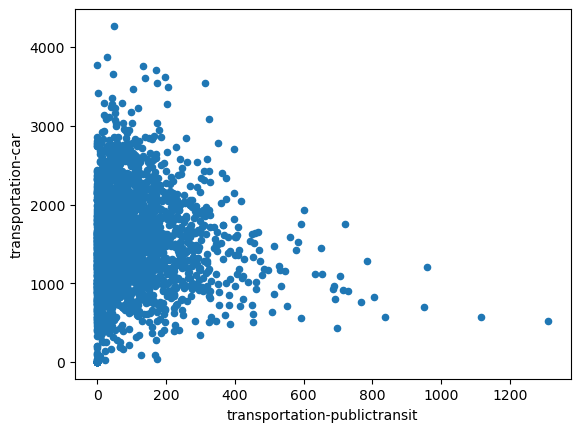

In [73]:
df2.plot.scatter(x='transportation-publictransit',y='transportation-car')

## Adding geographic data

In [45]:
# read in a geojson file downloaded from the LA Times
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

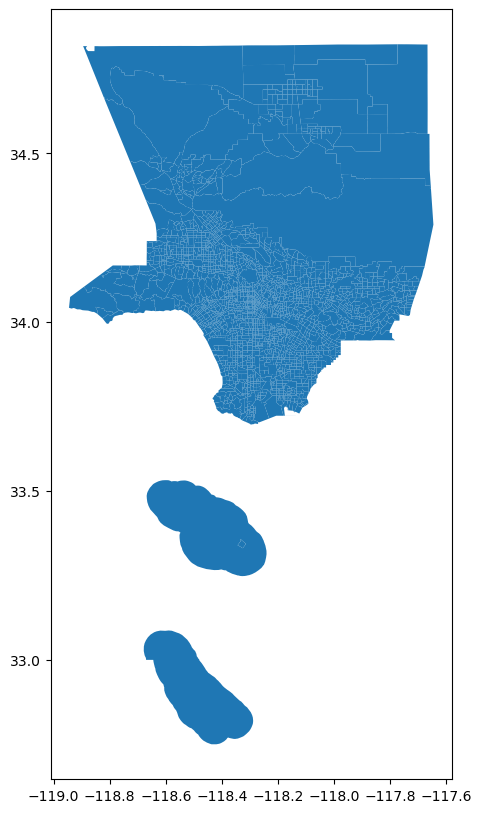

In [16]:
tracts.plot(figsize=(12,10))

In [46]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [47]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


## Adding leading zeros to data

In [48]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [49]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


## Merging data

In [50]:
tracts_data=tracts.merge(df2,on="FIPS")

In [51]:
tracts_data.head()

,CT20,geometry,FIPS,insurance,% insurance,no insurance,% no insurance,public insurance,% public insurance,private insurance,...,transportation-publictransit,% transportation-publictransit,transportation-motorcycle,% transportation-motorcycle,transportation-bicycle,% transportation-bicycle,transportation-walked,% transportation-walked,transportation-other,% transportation-other
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,3590,94.32,216,5.68,1609,42.28,2503,...,60,3.10,15,0.77,0,0.0,14,0.72,2,0.10
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4081,96.18,162,3.82,1371,32.31,3084,...,18,0.91,0,0.00,0,0.0,0,0.00,77,3.89
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3265,91.12,318,8.88,1506,42.03,2057,...,100,5.79,0,0.00,0,0.0,32,1.85,93,5.39
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3310,89.80,376,10.20,1772,48.07,1803,...,61,3.68,0,0.00,0,0.0,0,0.00,112,6.76
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2403,89.33,287,10.67,1308,48.62,1201,...,33,3.02,0,0.00,0,0.0,45,4.12,0,0.00


## Mapping data for insurance

### No insurance

<AxesSubplot: >

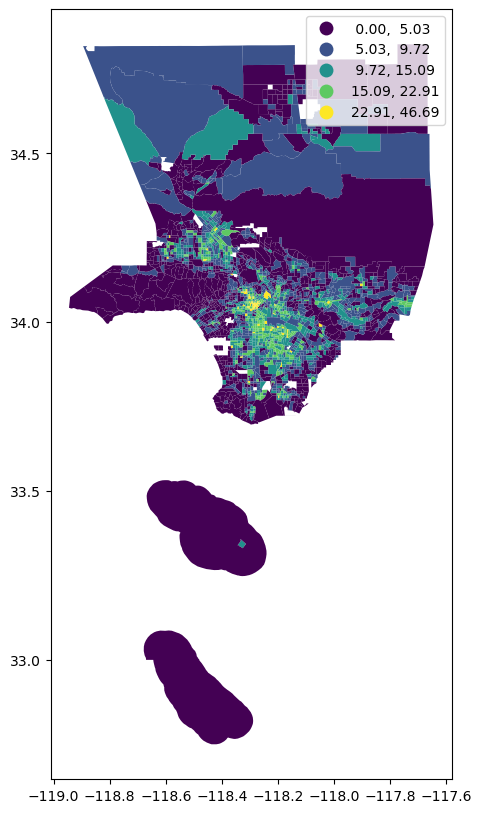

In [52]:
tracts_data.plot(figsize=(12,10),
                 column='% no insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

### Insurance

<AxesSubplot: >

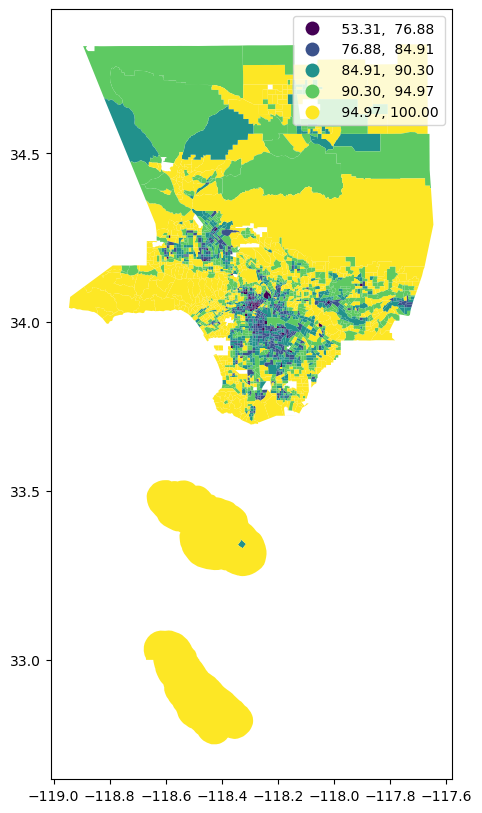

In [53]:
tracts_data.plot(figsize=(12,10),
                 column='% insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

### Insurance, public

<AxesSubplot: >

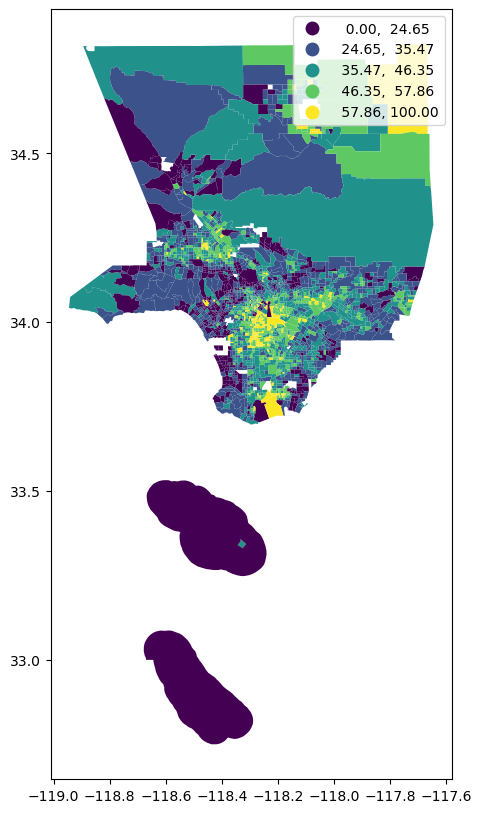

In [54]:
tracts_data.plot(figsize=(12,10),
                 column='% public insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

### Insurance, private

<AxesSubplot: >

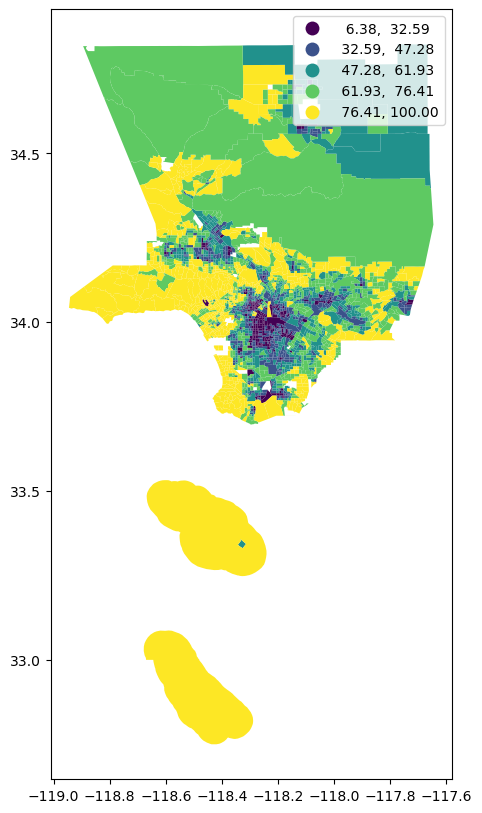

In [55]:
tracts_data.plot(figsize=(12,10),
                 column='% private insurance',
                 legend=True, 
                 scheme='NaturalBreaks')

## Mapping for commuting transportation modes

### Commuting by car

<AxesSubplot: >

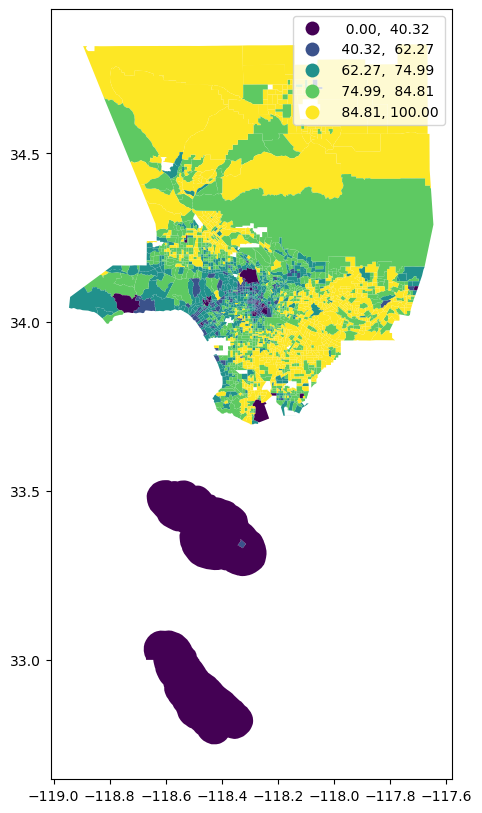

In [58]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-car',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by public transit

<AxesSubplot: >

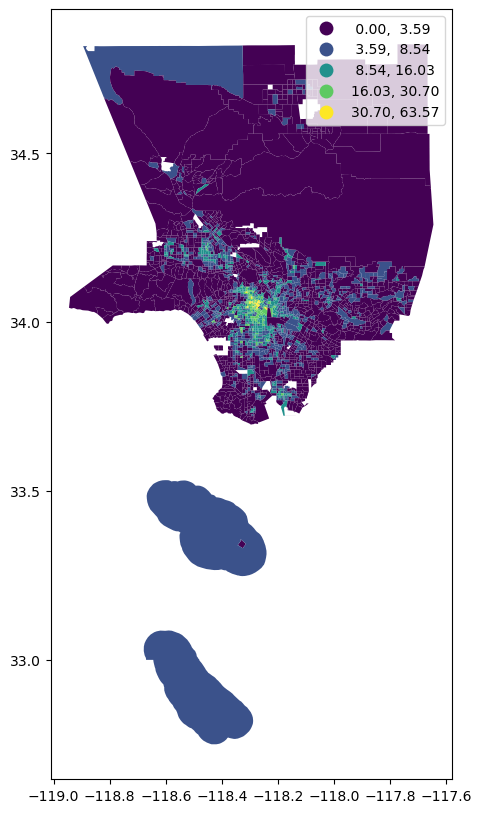

In [60]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-publictransit',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by motorcycle

<AxesSubplot: >

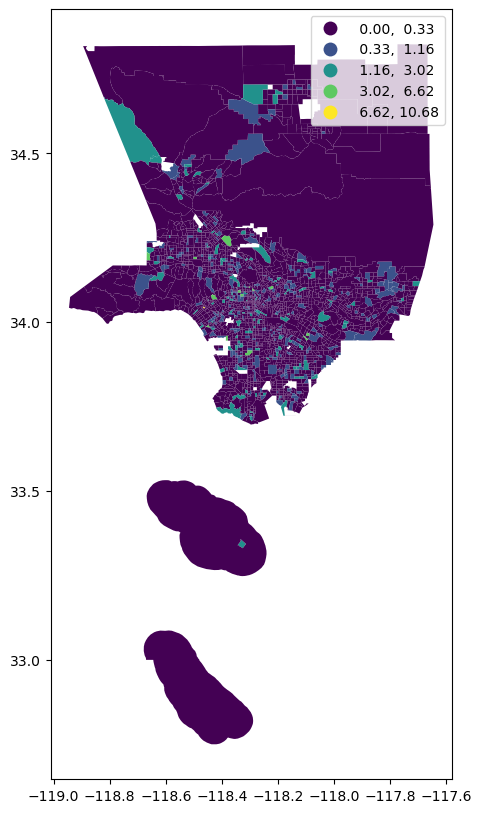

In [61]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-motorcycle',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by bicycle

<AxesSubplot: >

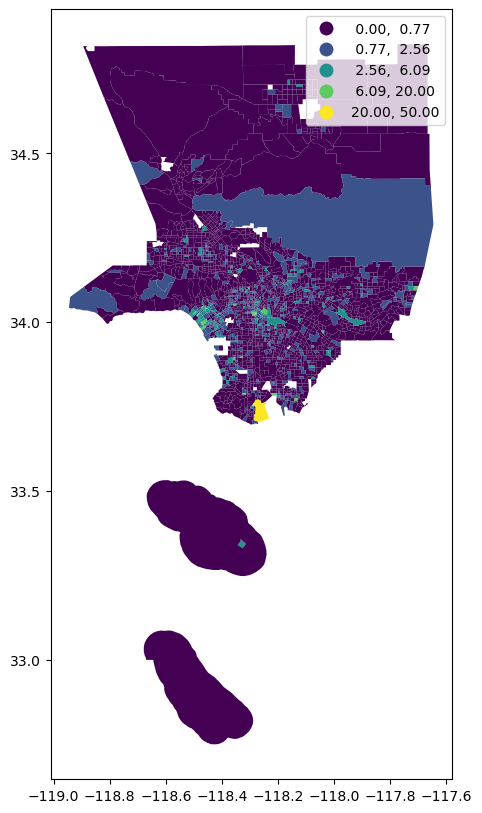

In [62]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-bicycle',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by walking

<AxesSubplot: >

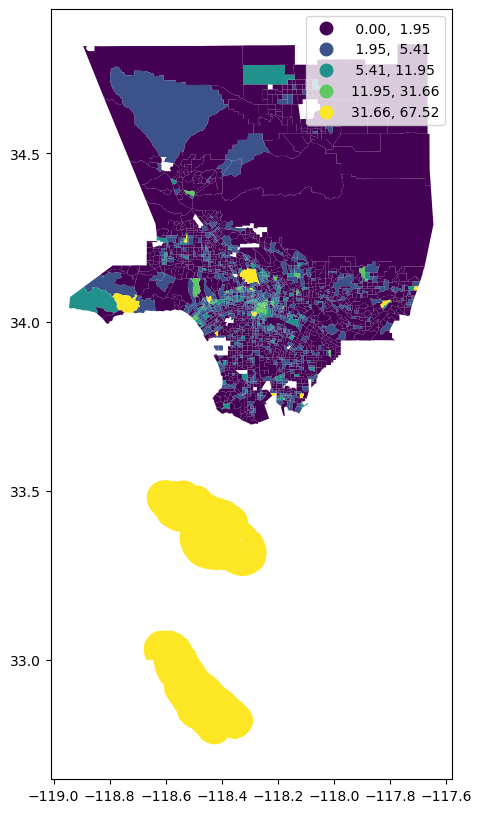

In [63]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-walked',
                 legend=True,
                 scheme='NaturalBreaks')

### Commuting by other modes of transportation 

<AxesSubplot: >

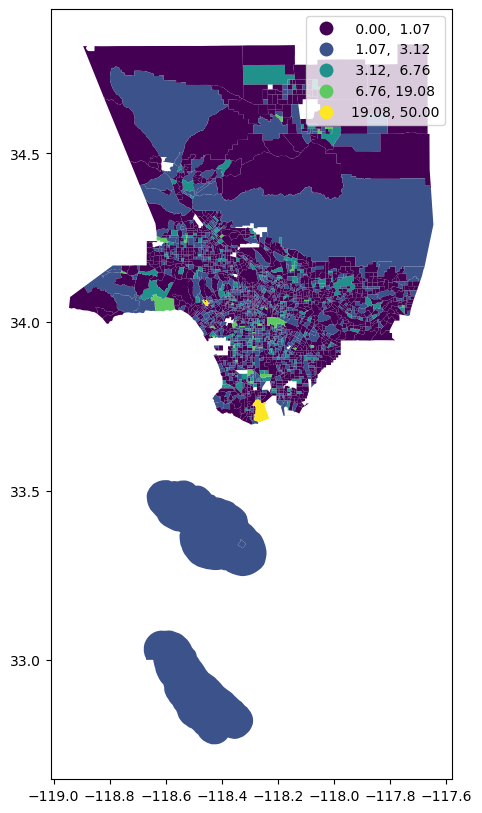

In [64]:
tracts_data.plot(figsize=(12,10),
                 column='% transportation-other',
                 legend=True,
                 scheme='NaturalBreaks')